In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

Dataset: https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

In [12]:
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',
        'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv(r"D:\Data Science basics\Datasets\magic04.data", names = cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [13]:
df['class'] = (df['class'] == 'g').astype(int)

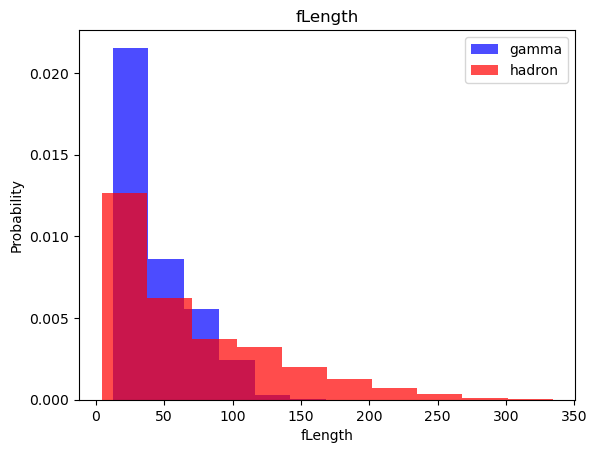

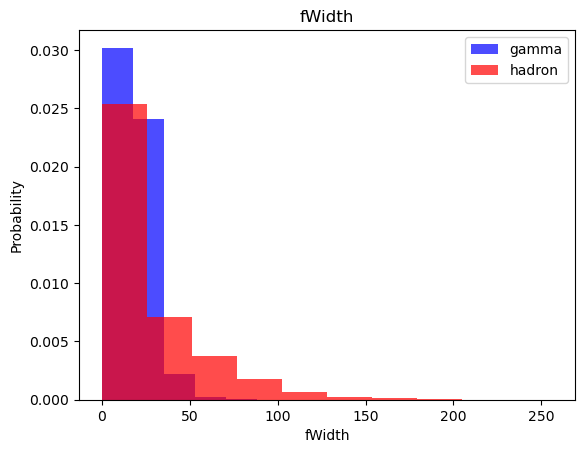

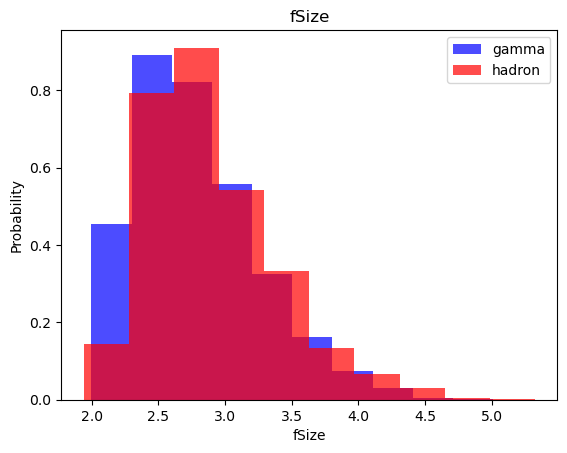

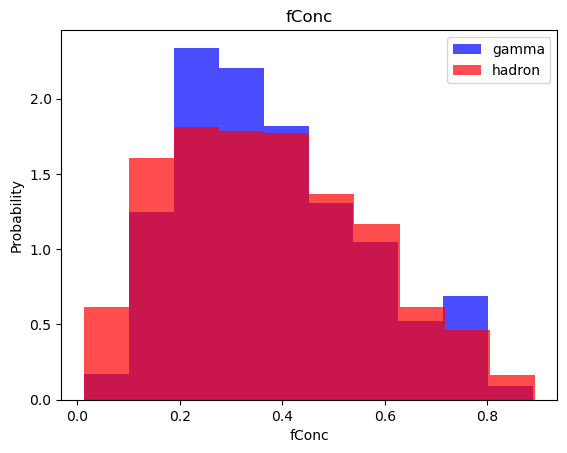

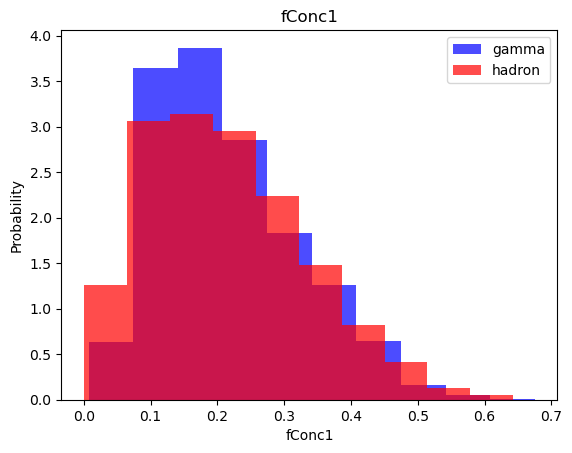

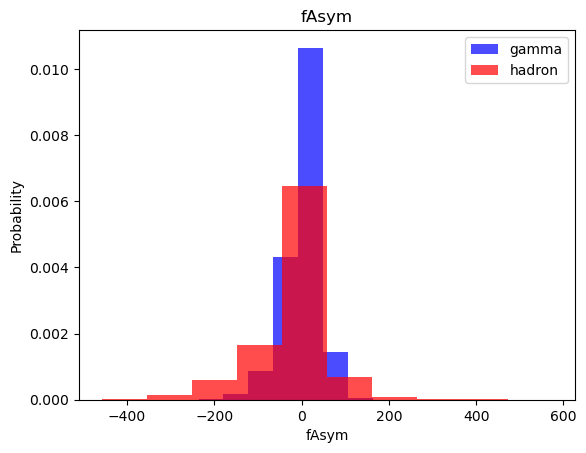

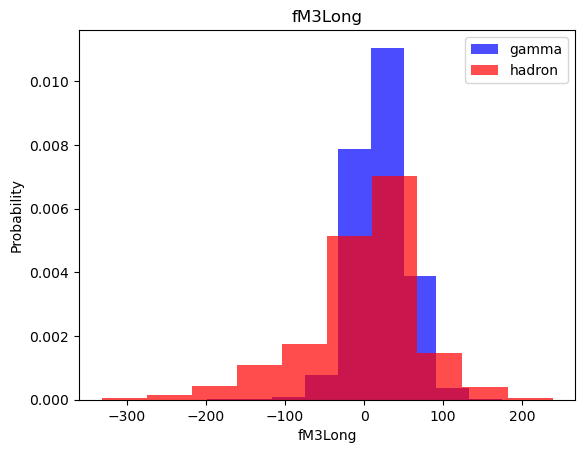

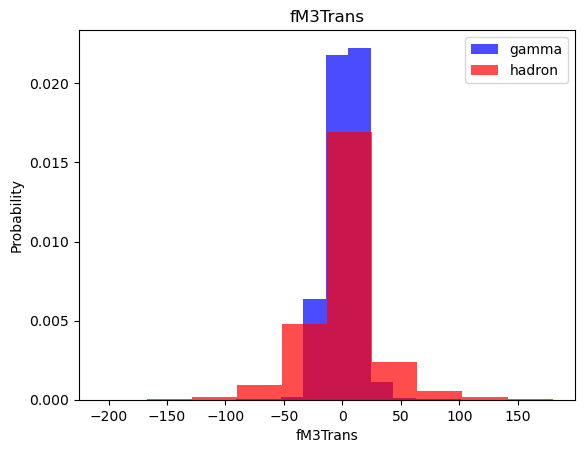

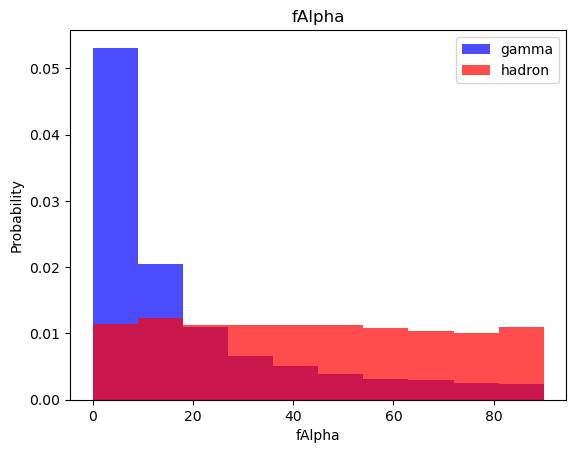

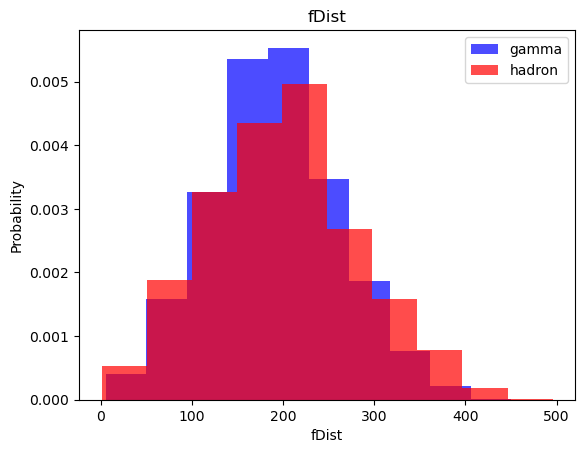

In [14]:
for label in cols[:-1]:  
    plt.hist(df[df['class'] == 1][label], color = 'blue', label = 'gamma', alpha = 0.7, density = True)
    plt.hist(df[df['class'] == 0][label], color = 'red', label = 'hadron', alpha = 0.7, density = True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

#TRAIN, VALIDATE AND TEST DATASETS

In [15]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

C:\Users\Harivenkat\anaconda3\envs\python_mov\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [16]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [17]:
train, x_train, y_train = scale_dataset(train, oversample = True)
valid, x_valid, y_valid = scale_dataset(valid, oversample = False)
test, x_test, y_test = scale_dataset(test, oversample = False)

In [18]:
print(len(y_train))
print(len(x_train))

14814
14814


KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [20]:
knn_model = KNeighborsClassifier(n_neighbors = 50)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [21]:
y_pred = knn_model.predict(x_test)

print(classification_report(y_test, y_pred))

 Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB

In [23]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

In [24]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.39      0.50      1346
           1       0.73      0.90      0.80      2458

    accuracy                           0.72      3804
   macro avg       0.70      0.65      0.65      3804
weighted avg       0.71      0.72      0.70      3804



SVM(Support Vector Machine)

In [25]:
from sklearn.svm import SVC

In [26]:
svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)

In [27]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1346
           1       0.89      0.91      0.90      2458

    accuracy                           0.87      3804
   macro avg       0.86      0.85      0.85      3804
weighted avg       0.87      0.87      0.87      3804



Neural network using TensorFlow

In [28]:
import tensorflow as tf

In [42]:
def plot_loss(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize(10, 4))
    ax1.plot(history.history['loss'], label = 'loss')
    ax1.plot(history.history['val_loss'], label = 'val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary Entropy')
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label = 'accuracy')
    ax2.plot(history.history['val_accuracy'], label = 'val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)
    
    plt.show()

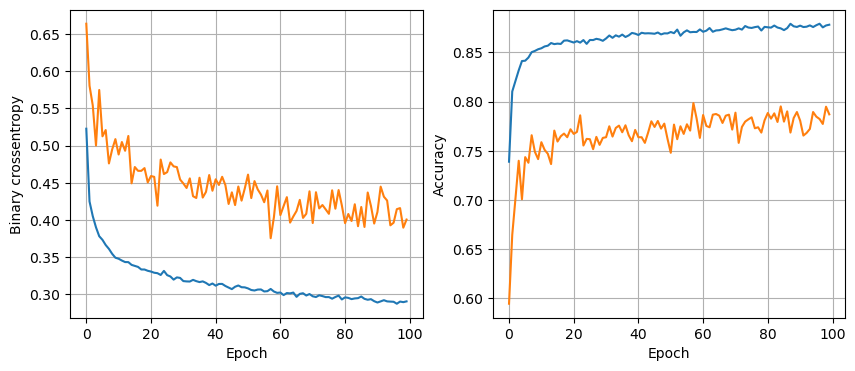

In [52]:
plot_history(history)

In [38]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
   nn_model = tf.keras.Sequential([
       tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10, )),
       tf.keras.layers.Dropout(dropout_prob),
       tf.keras.layers.Dense(num_nodes, activation='relu'),
       tf.keras.layers.Dropout(dropout_prob),
       tf.keras.layers.Dense(1, activation='sigmoid')
   ])

   nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), 
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    
   history = nn_model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, 
                          validation_split = 0.2, verbose = 0)

   return nn_model, history

nodes 16, dropout 0, lr 0.01, batch size 32


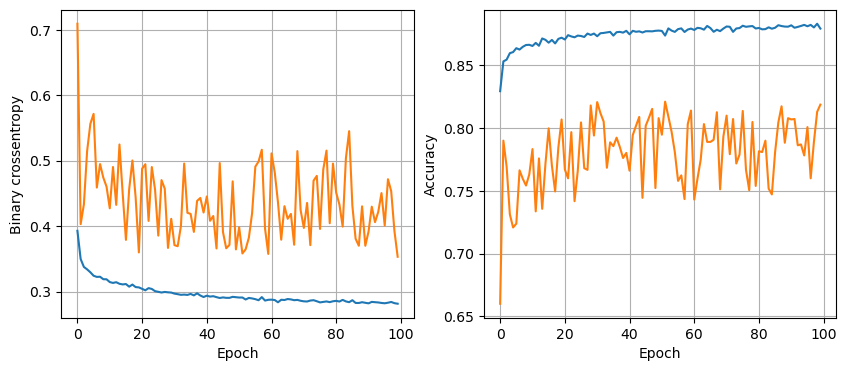

119/119 [==============================] - 0s 1ms/step - loss: 0.3376 - accuracy: 0.8625
nodes 16, dropout 0, lr 0.01, batch size 64


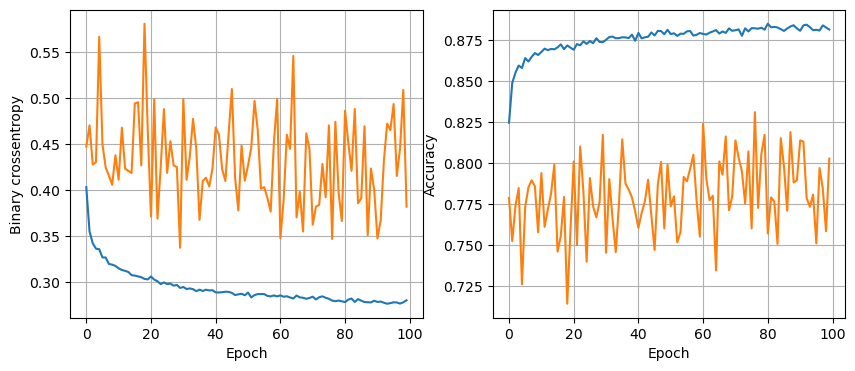

119/119 [==============================] - 0s 1ms/step - loss: 0.3224 - accuracy: 0.8672
nodes 16, dropout 0, lr 0.01, batch size 128


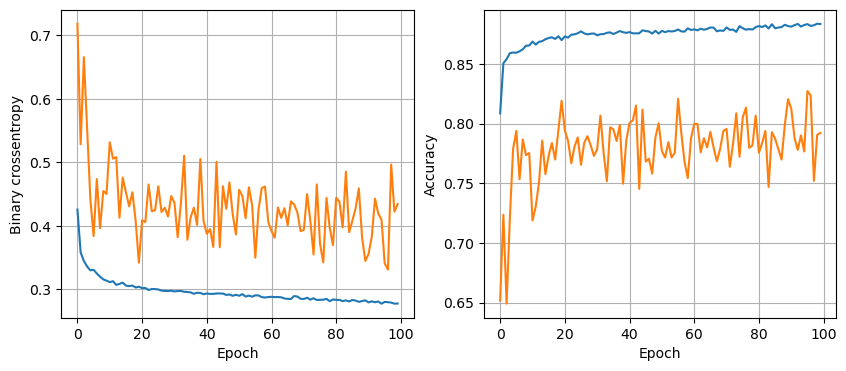

119/119 [==============================] - 0s 1ms/step - loss: 0.3342 - accuracy: 0.8715
nodes 16, dropout 0, lr 0.005, batch size 32


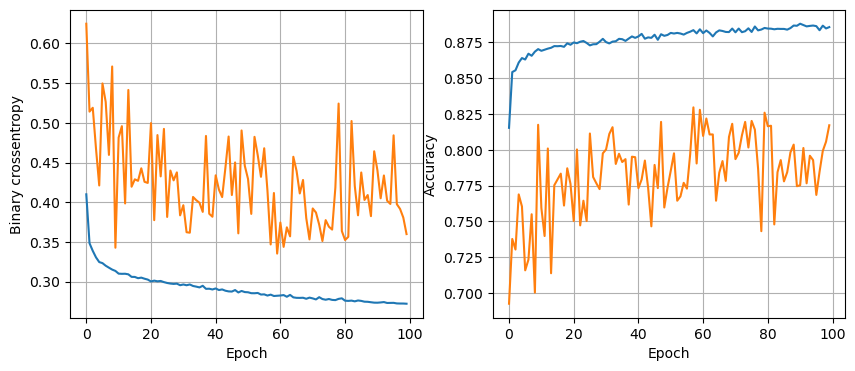

119/119 [==============================] - 0s 1ms/step - loss: 0.3292 - accuracy: 0.8712
nodes 16, dropout 0, lr 0.005, batch size 64


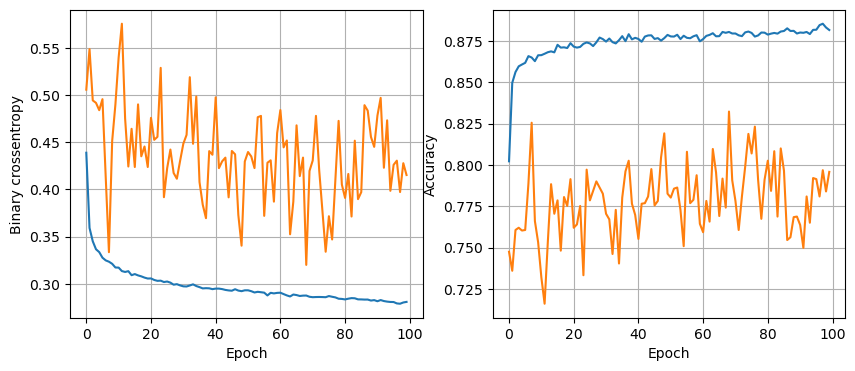

119/119 [==============================] - 0s 981us/step - loss: 0.3261 - accuracy: 0.8670
nodes 16, dropout 0, lr 0.005, batch size 128


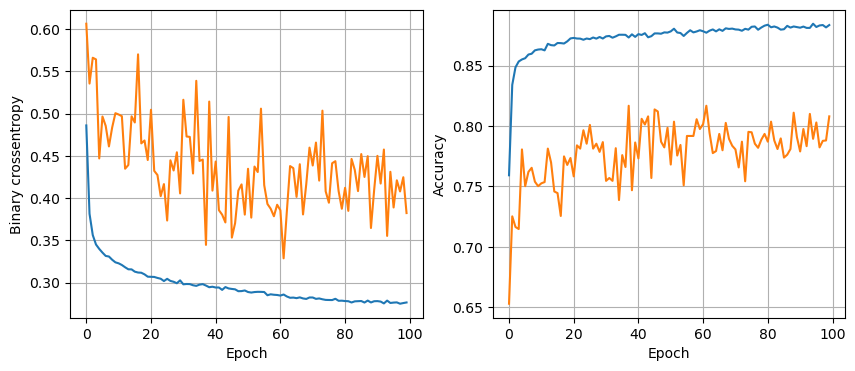

119/119 [==============================] - 0s 906us/step - loss: 0.3254 - accuracy: 0.8686
nodes 16, dropout 0, lr 0.001, batch size 32


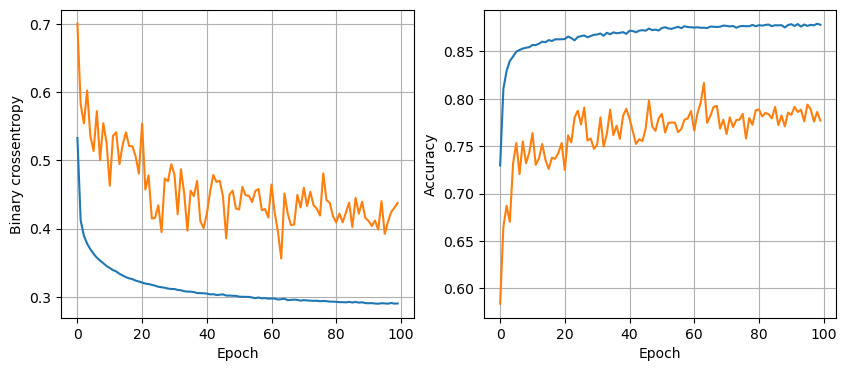

119/119 [==============================] - 0s 917us/step - loss: 0.3174 - accuracy: 0.8665
nodes 16, dropout 0, lr 0.001, batch size 64


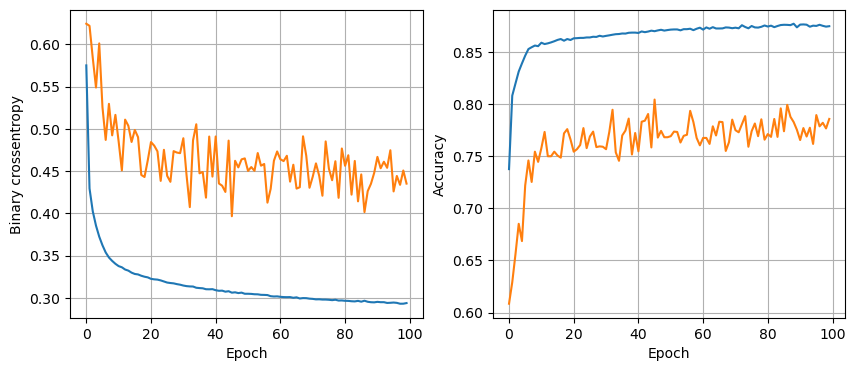

119/119 [==============================] - 0s 803us/step - loss: 0.3186 - accuracy: 0.8707
nodes 16, dropout 0, lr 0.001, batch size 128


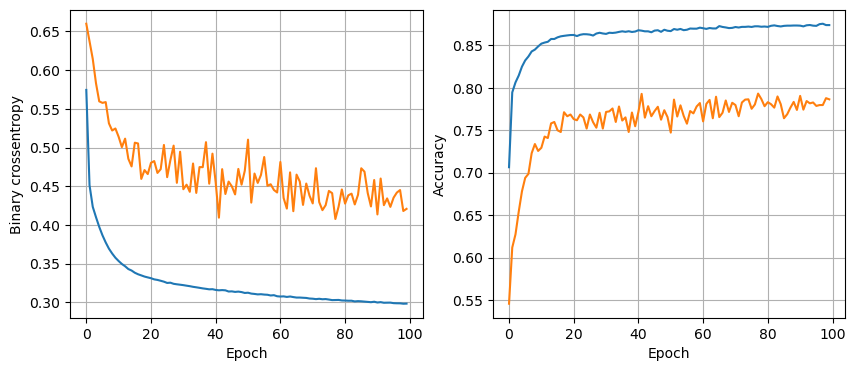

119/119 [==============================] - 0s 910us/step - loss: 0.3214 - accuracy: 0.8678
nodes 16, dropout 0.2, lr 0.01, batch size 32


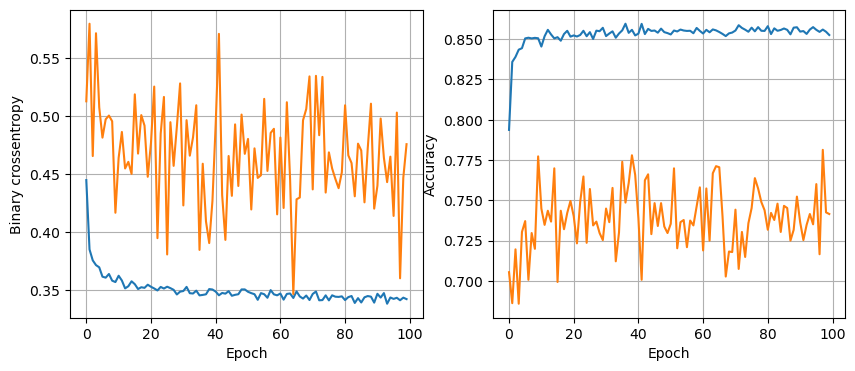

119/119 [==============================] - 0s 1ms/step - loss: 0.3152 - accuracy: 0.8741
nodes 16, dropout 0.2, lr 0.01, batch size 64


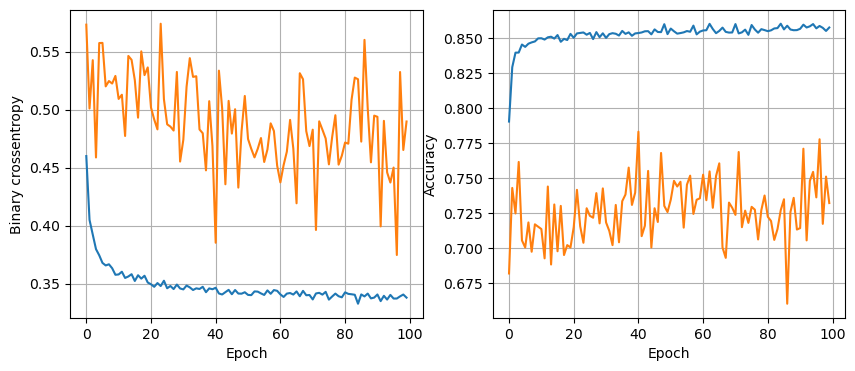

119/119 [==============================] - 0s 953us/step - loss: 0.3144 - accuracy: 0.8743
nodes 16, dropout 0.2, lr 0.01, batch size 128


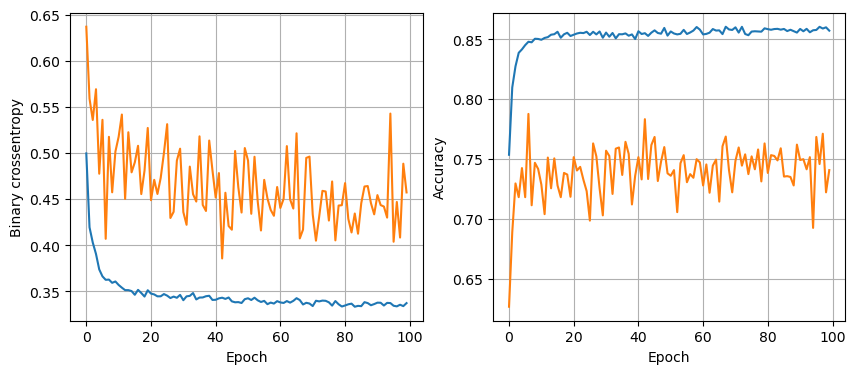

119/119 [==============================] - 0s 939us/step - loss: 0.3192 - accuracy: 0.8746
nodes 16, dropout 0.2, lr 0.005, batch size 32


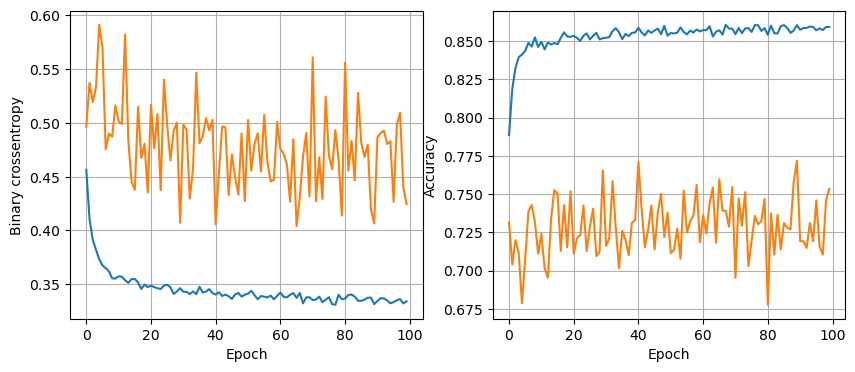

119/119 [==============================] - 0s 927us/step - loss: 0.3192 - accuracy: 0.8683
nodes 16, dropout 0.2, lr 0.005, batch size 64


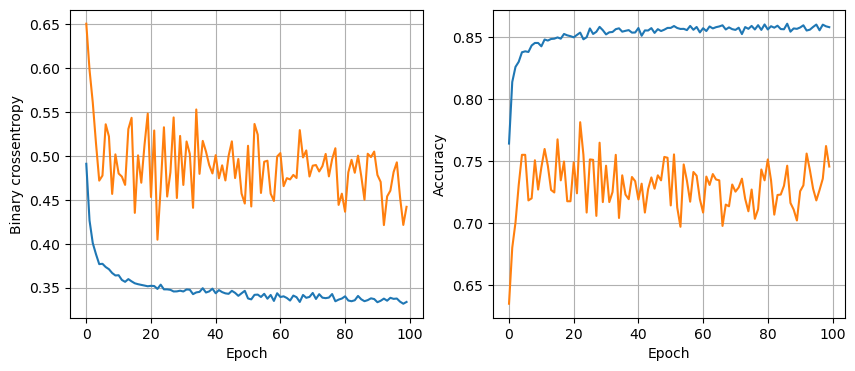

119/119 [==============================] - 0s 1ms/step - loss: 0.3244 - accuracy: 0.8693
nodes 16, dropout 0.2, lr 0.005, batch size 128


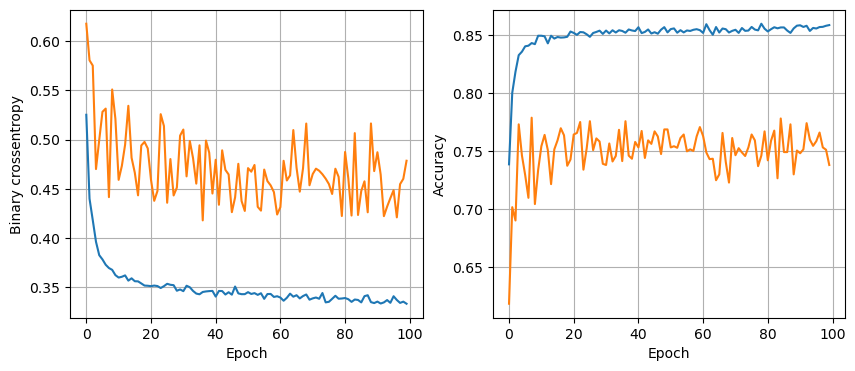

119/119 [==============================] - 0s 977us/step - loss: 0.3155 - accuracy: 0.8696
nodes 16, dropout 0.2, lr 0.001, batch size 32


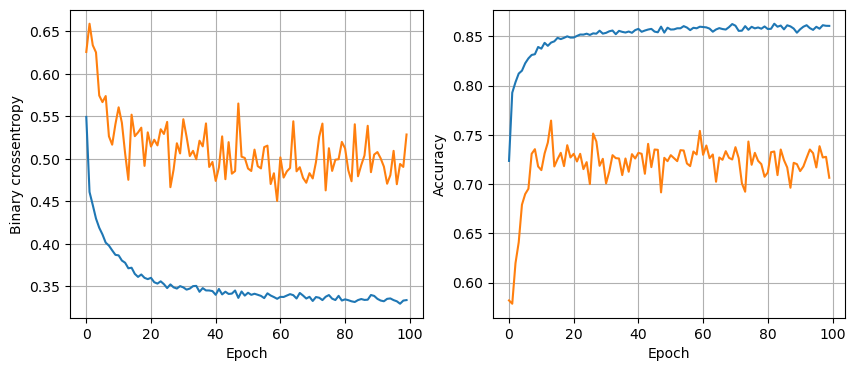

119/119 [==============================] - 0s 923us/step - loss: 0.3186 - accuracy: 0.8670
nodes 16, dropout 0.2, lr 0.001, batch size 64


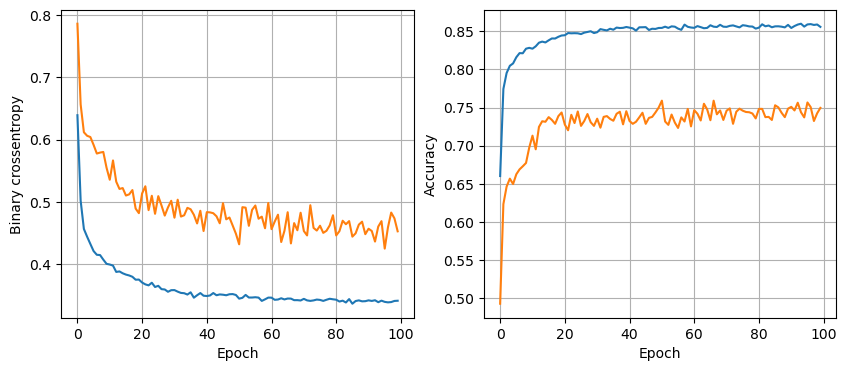

119/119 [==============================] - 0s 1ms/step - loss: 0.3175 - accuracy: 0.8691
nodes 16, dropout 0.2, lr 0.001, batch size 128


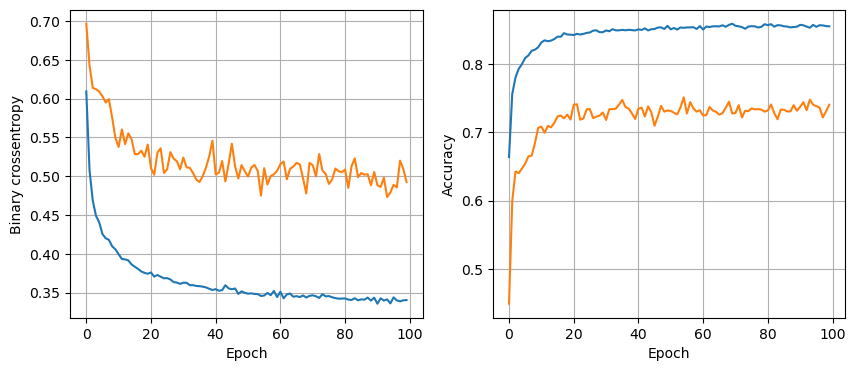

119/119 [==============================] - 0s 908us/step - loss: 0.3128 - accuracy: 0.8675
nodes 32, dropout 0, lr 0.01, batch size 32


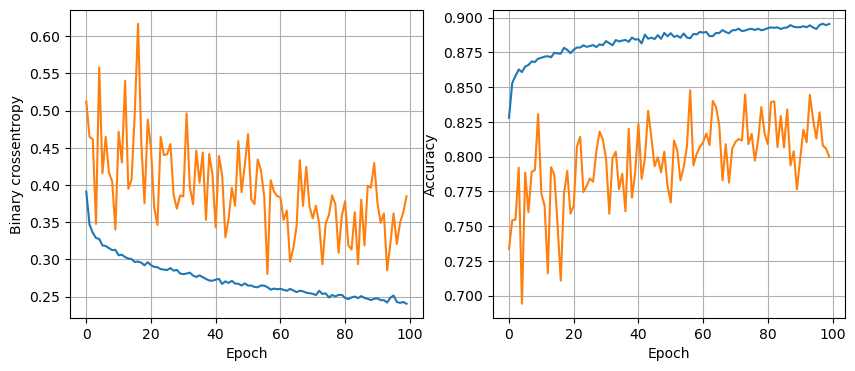

119/119 [==============================] - 0s 1ms/step - loss: 0.3722 - accuracy: 0.8728
nodes 32, dropout 0, lr 0.01, batch size 64


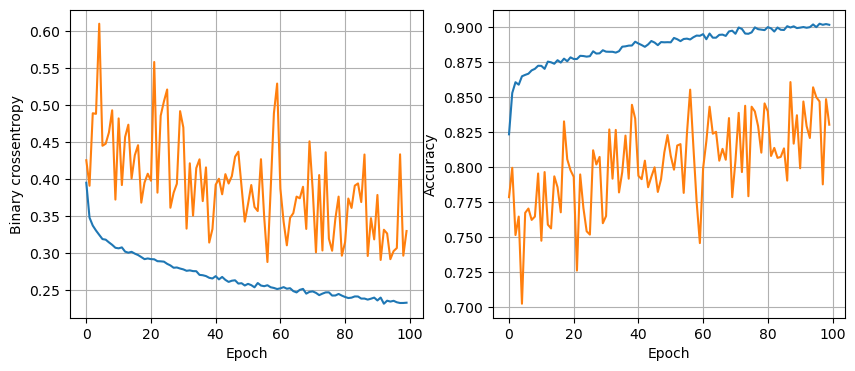

119/119 [==============================] - 0s 978us/step - loss: 0.3690 - accuracy: 0.8620
nodes 32, dropout 0, lr 0.01, batch size 128


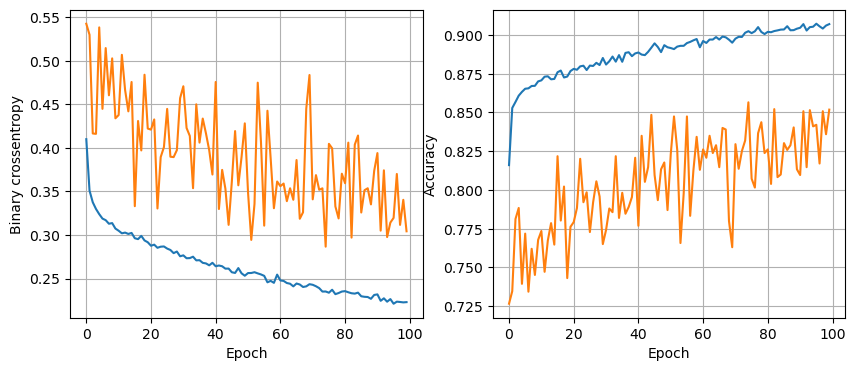

119/119 [==============================] - 0s 1ms/step - loss: 0.3695 - accuracy: 0.8623
nodes 32, dropout 0, lr 0.005, batch size 32


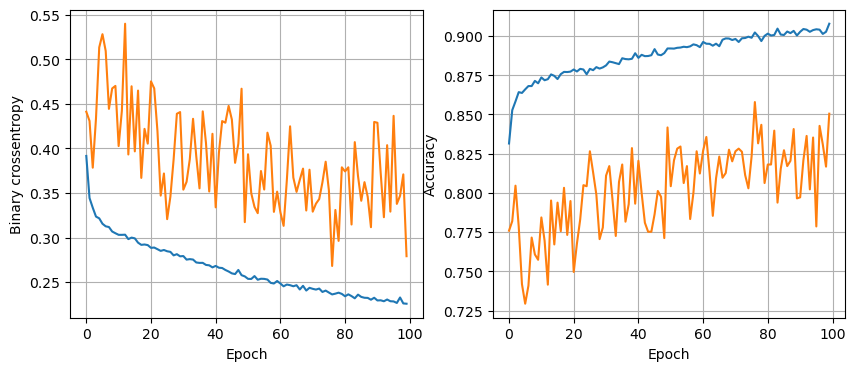

119/119 [==============================] - 0s 934us/step - loss: 0.3945 - accuracy: 0.8452
nodes 32, dropout 0, lr 0.005, batch size 64


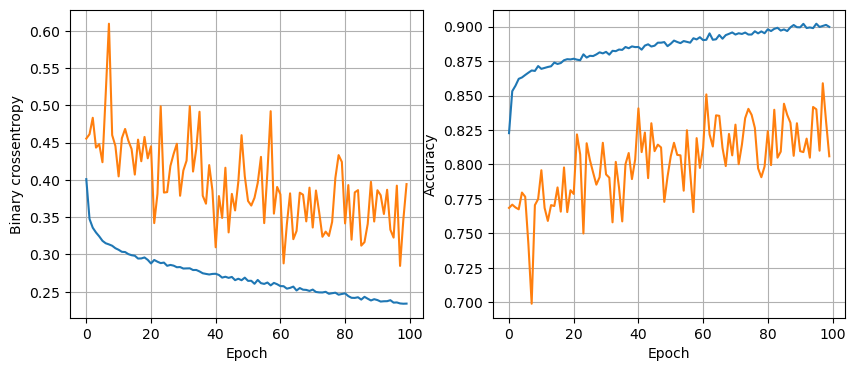

119/119 [==============================] - 0s 1ms/step - loss: 0.3596 - accuracy: 0.8691
nodes 32, dropout 0, lr 0.005, batch size 128


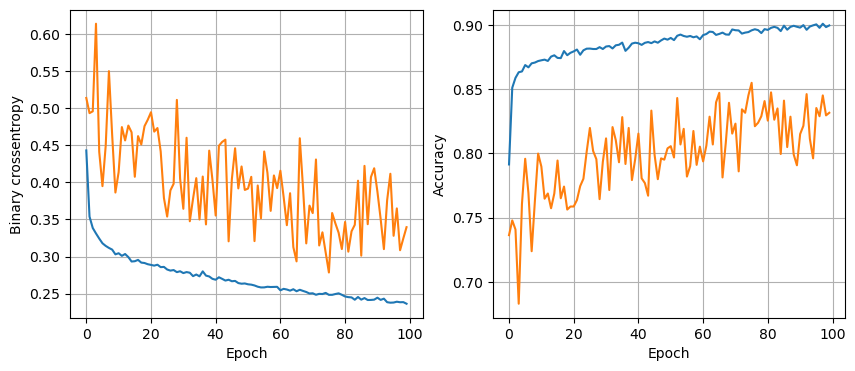

119/119 [==============================] - 0s 1ms/step - loss: 0.3468 - accuracy: 0.8683
nodes 32, dropout 0, lr 0.001, batch size 32


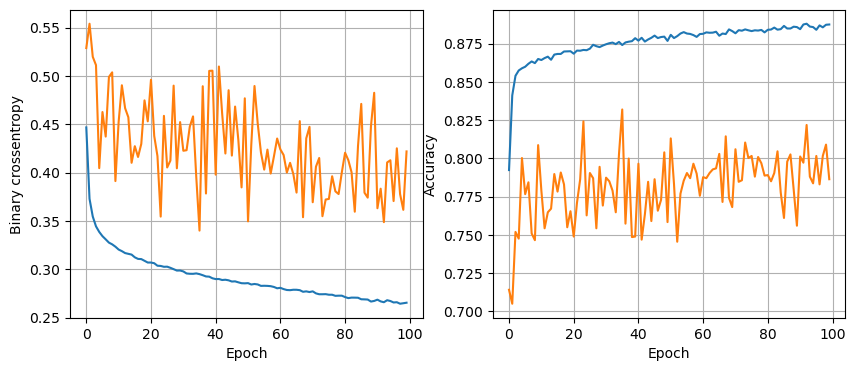

119/119 [==============================] - 0s 998us/step - loss: 0.3243 - accuracy: 0.8712
nodes 32, dropout 0, lr 0.001, batch size 64


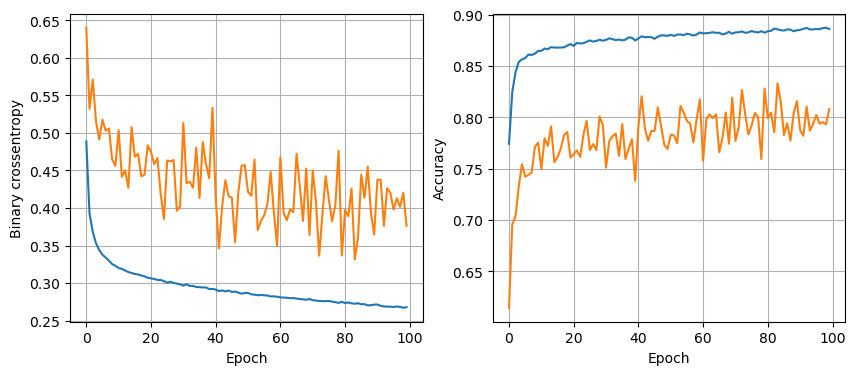

119/119 [==============================] - 0s 1ms/step - loss: 0.3194 - accuracy: 0.8715
nodes 32, dropout 0, lr 0.001, batch size 128


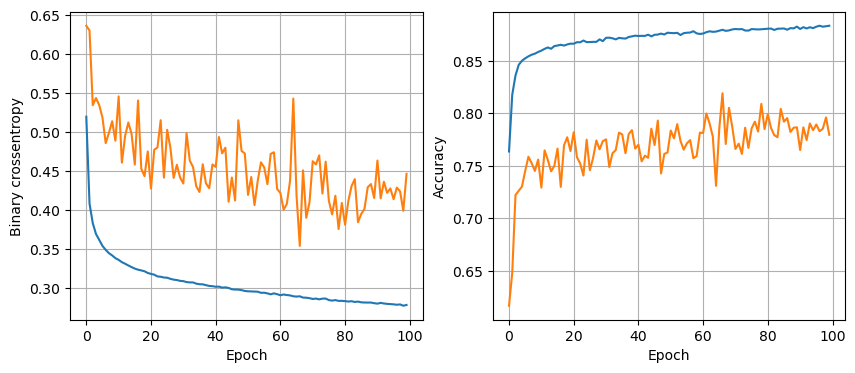

119/119 [==============================] - 0s 992us/step - loss: 0.3199 - accuracy: 0.8696
nodes 32, dropout 0.2, lr 0.01, batch size 32


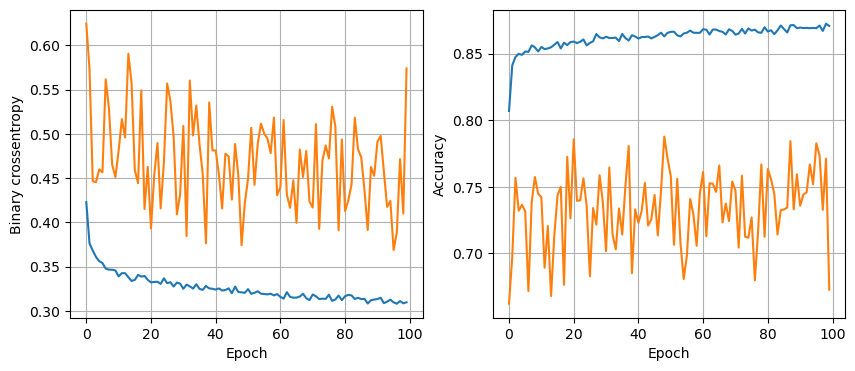

119/119 [==============================] - 0s 953us/step - loss: 0.3275 - accuracy: 0.8633
nodes 32, dropout 0.2, lr 0.01, batch size 64


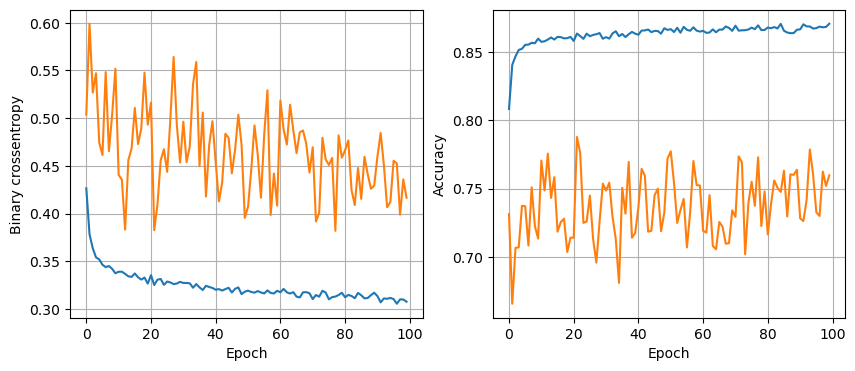

119/119 [==============================] - 0s 951us/step - loss: 0.3131 - accuracy: 0.8699
nodes 32, dropout 0.2, lr 0.01, batch size 128


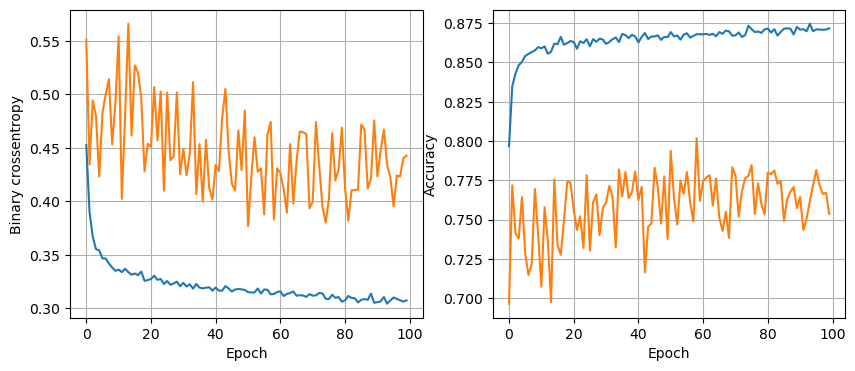

119/119 [==============================] - 0s 970us/step - loss: 0.3062 - accuracy: 0.8707
nodes 32, dropout 0.2, lr 0.005, batch size 32


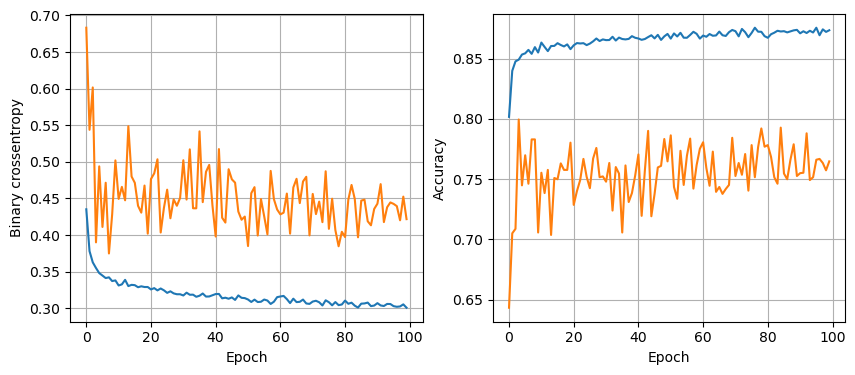

119/119 [==============================] - 0s 961us/step - loss: 0.3081 - accuracy: 0.8749
nodes 32, dropout 0.2, lr 0.005, batch size 64


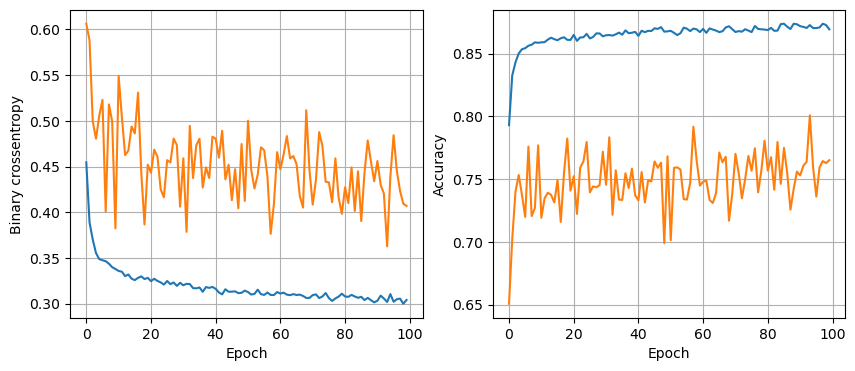

119/119 [==============================] - 0s 952us/step - loss: 0.3066 - accuracy: 0.8759
nodes 32, dropout 0.2, lr 0.005, batch size 128


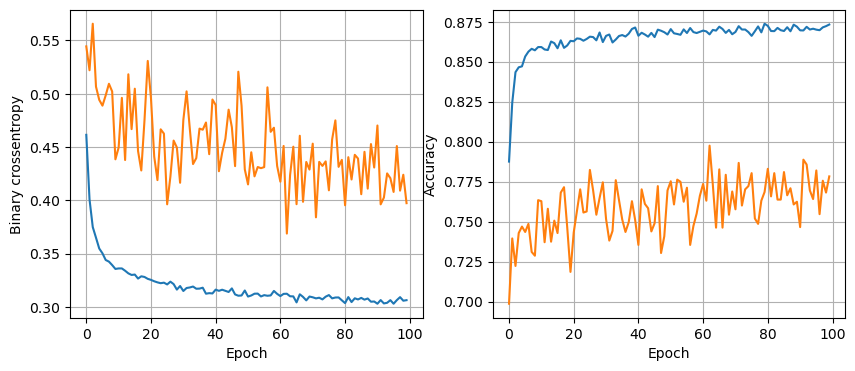

119/119 [==============================] - 0s 1ms/step - loss: 0.3073 - accuracy: 0.8733
nodes 32, dropout 0.2, lr 0.001, batch size 32


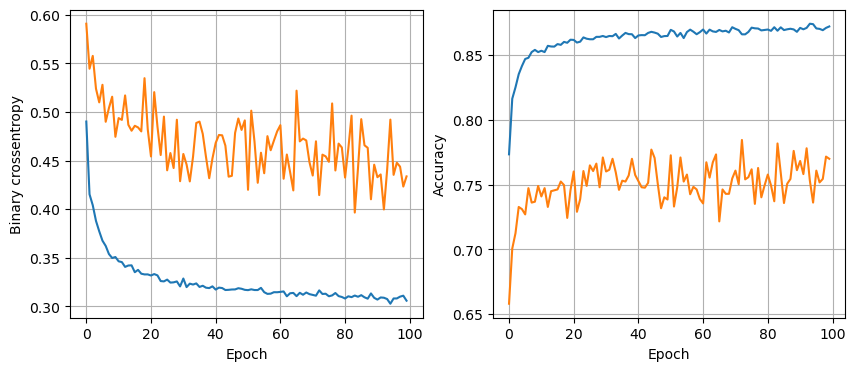

119/119 [==============================] - 0s 966us/step - loss: 0.3042 - accuracy: 0.8733
nodes 32, dropout 0.2, lr 0.001, batch size 64


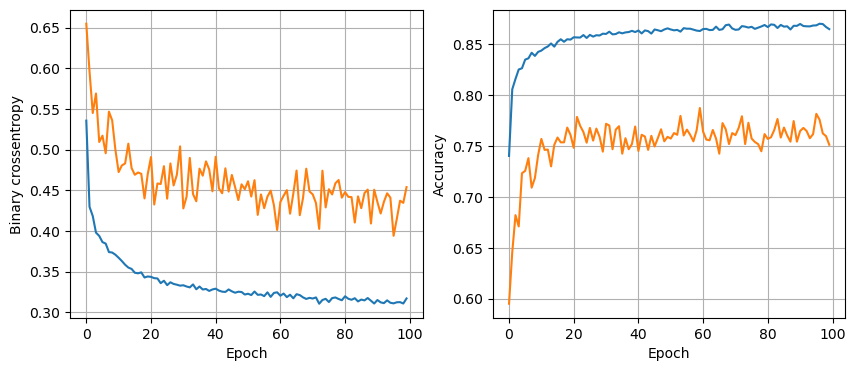

119/119 [==============================] - 0s 984us/step - loss: 0.3041 - accuracy: 0.8751
nodes 32, dropout 0.2, lr 0.001, batch size 128


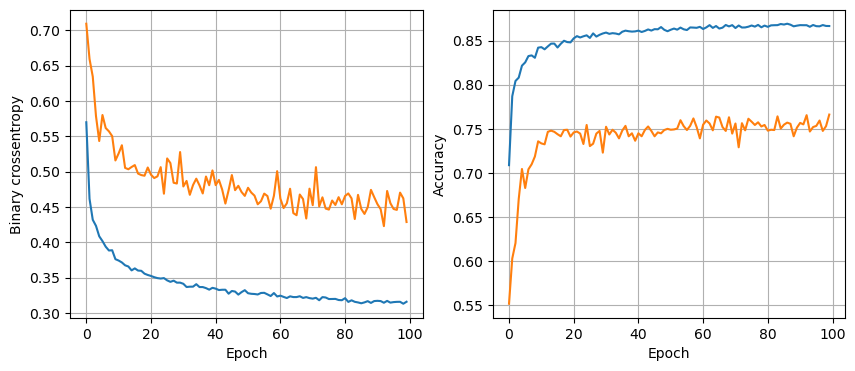

119/119 [==============================] - 0s 955us/step - loss: 0.3088 - accuracy: 0.8730
nodes 64, dropout 0, lr 0.01, batch size 32


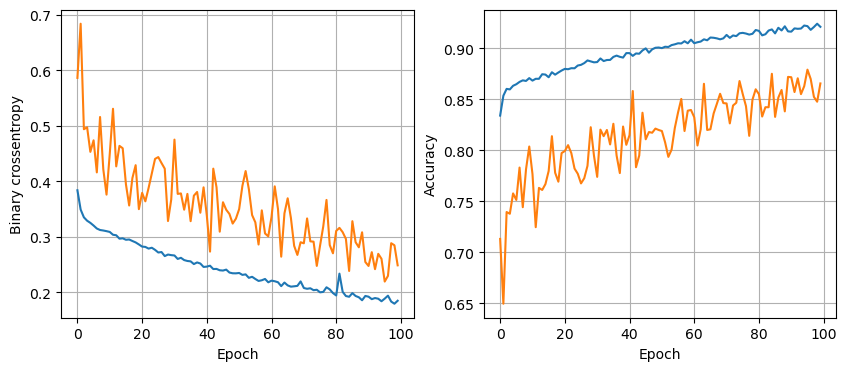

119/119 [==============================] - 0s 979us/step - loss: 0.5102 - accuracy: 0.8607
nodes 64, dropout 0, lr 0.01, batch size 64


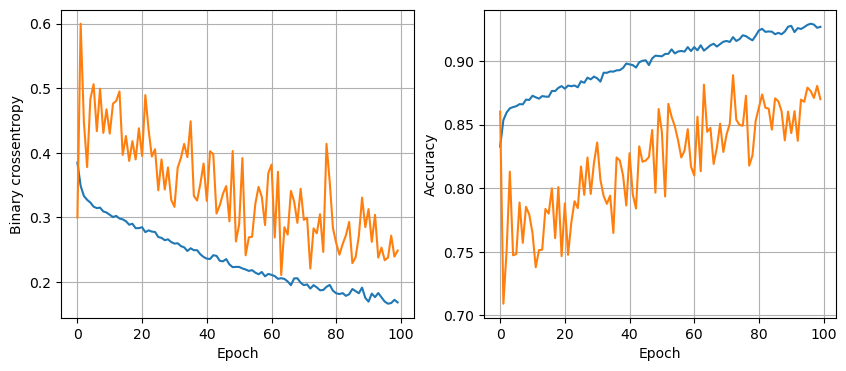

119/119 [==============================] - 0s 991us/step - loss: 0.6061 - accuracy: 0.8528
nodes 64, dropout 0, lr 0.01, batch size 128


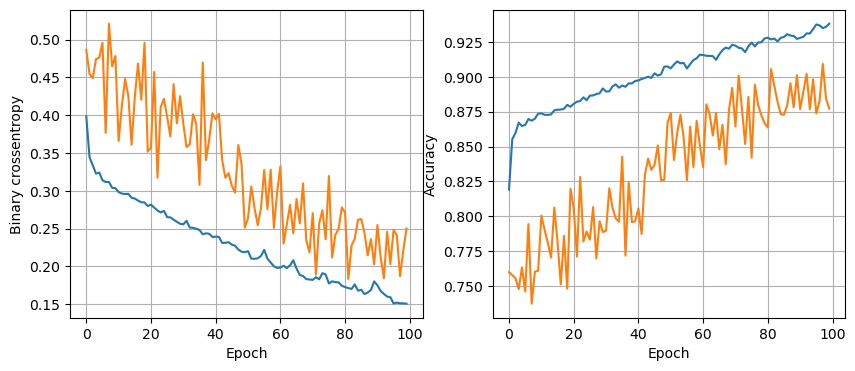

119/119 [==============================] - 0s 977us/step - loss: 0.5789 - accuracy: 0.8599
nodes 64, dropout 0, lr 0.005, batch size 32


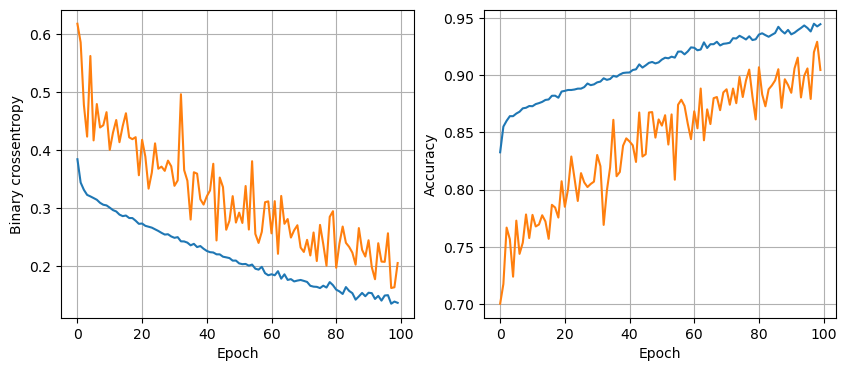

119/119 [==============================] - 0s 1ms/step - loss: 0.6496 - accuracy: 0.8562
nodes 64, dropout 0, lr 0.005, batch size 64


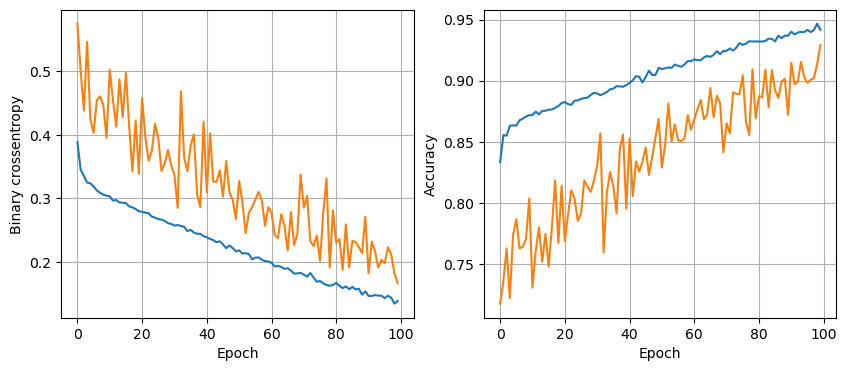

119/119 [==============================] - 0s 1ms/step - loss: 0.5682 - accuracy: 0.8486
nodes 64, dropout 0, lr 0.005, batch size 128


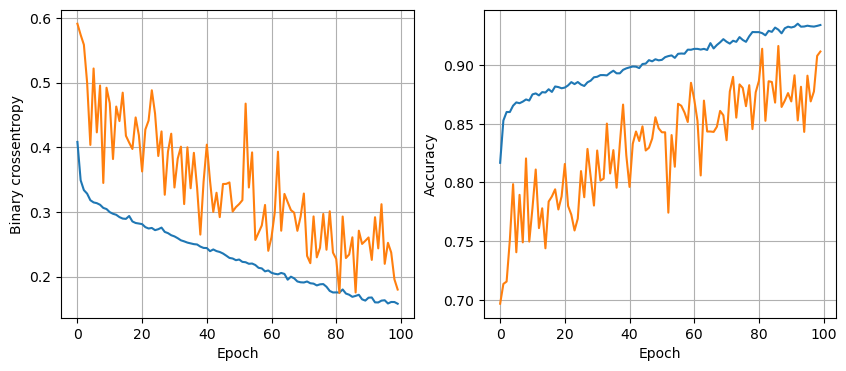

119/119 [==============================] - 0s 1ms/step - loss: 0.5095 - accuracy: 0.8465
nodes 64, dropout 0, lr 0.001, batch size 32


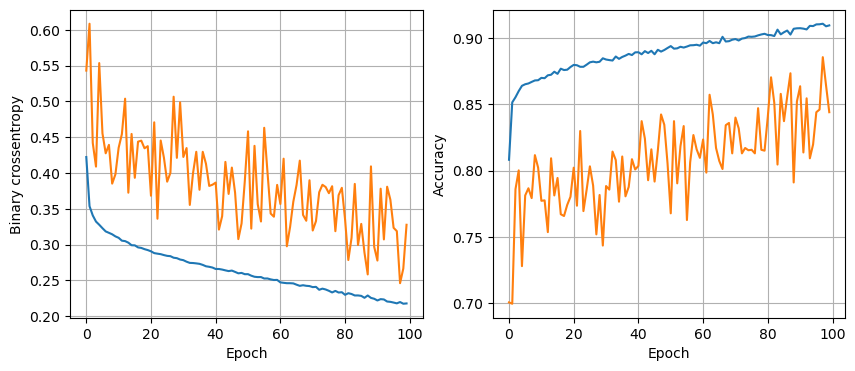

119/119 [==============================] - 0s 1ms/step - loss: 0.3583 - accuracy: 0.8654
nodes 64, dropout 0, lr 0.001, batch size 64


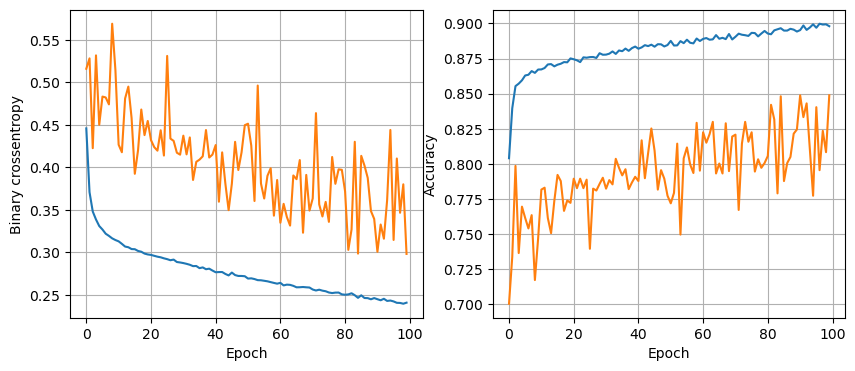

119/119 [==============================] - 0s 1ms/step - loss: 0.3313 - accuracy: 0.8630
nodes 64, dropout 0, lr 0.001, batch size 128


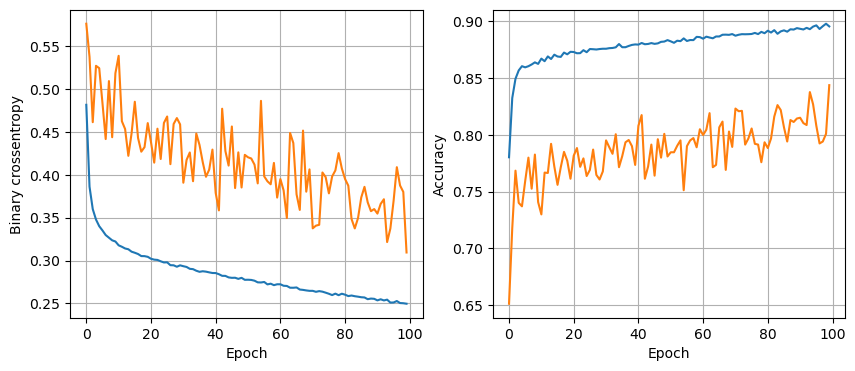

119/119 [==============================] - 0s 1ms/step - loss: 0.3335 - accuracy: 0.8667
nodes 64, dropout 0.2, lr 0.01, batch size 32


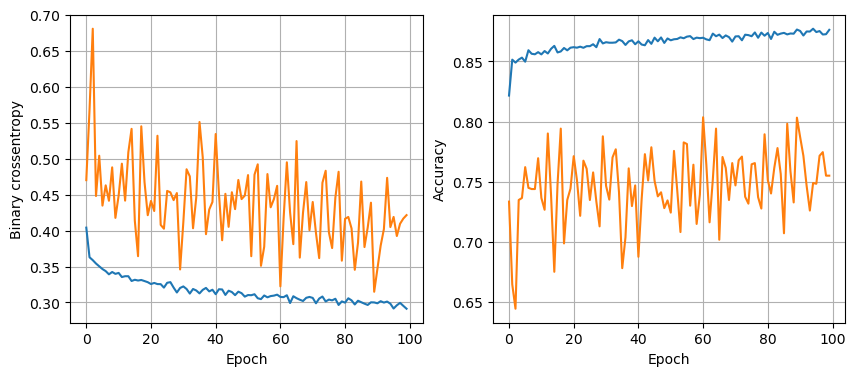

119/119 [==============================] - 0s 1ms/step - loss: 0.3228 - accuracy: 0.8675
nodes 64, dropout 0.2, lr 0.01, batch size 64


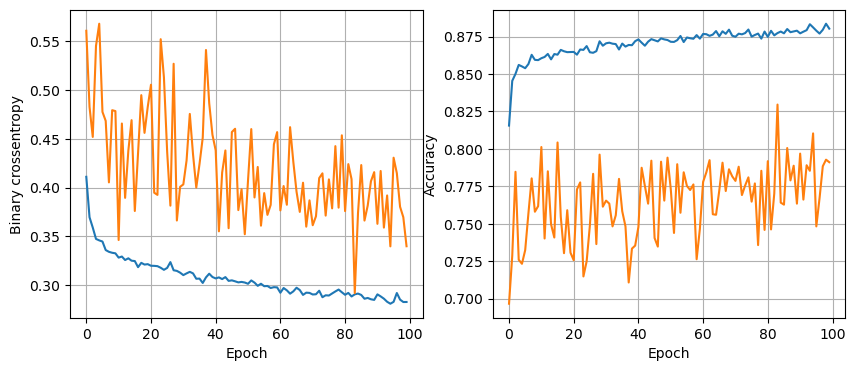

119/119 [==============================] - 0s 1ms/step - loss: 0.3145 - accuracy: 0.8707
nodes 64, dropout 0.2, lr 0.01, batch size 128


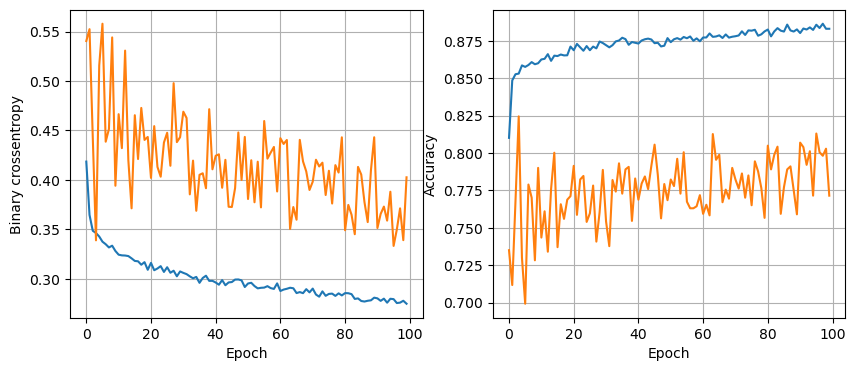

119/119 [==============================] - 0s 1ms/step - loss: 0.3157 - accuracy: 0.8672
nodes 64, dropout 0.2, lr 0.005, batch size 32


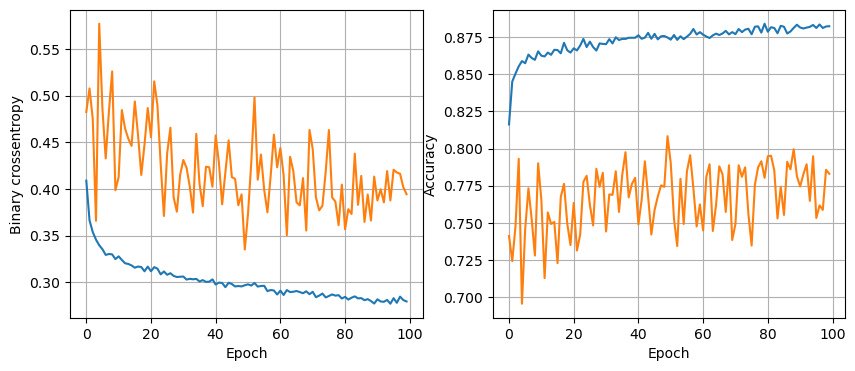

119/119 [==============================] - 0s 1ms/step - loss: 0.3112 - accuracy: 0.8783
nodes 64, dropout 0.2, lr 0.005, batch size 64


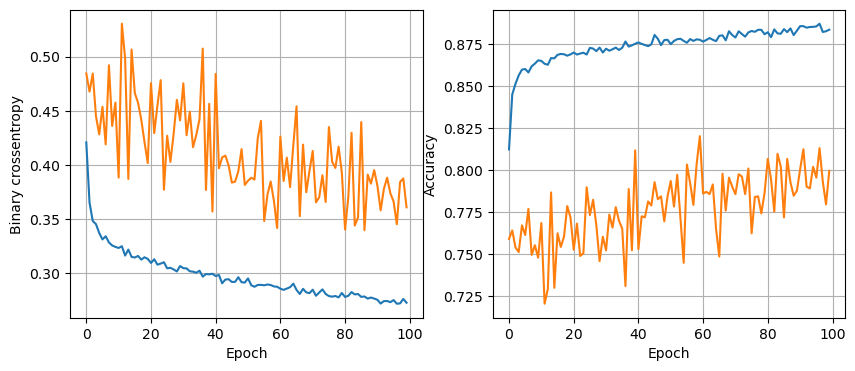

119/119 [==============================] - 0s 1ms/step - loss: 0.3086 - accuracy: 0.8775
nodes 64, dropout 0.2, lr 0.005, batch size 128


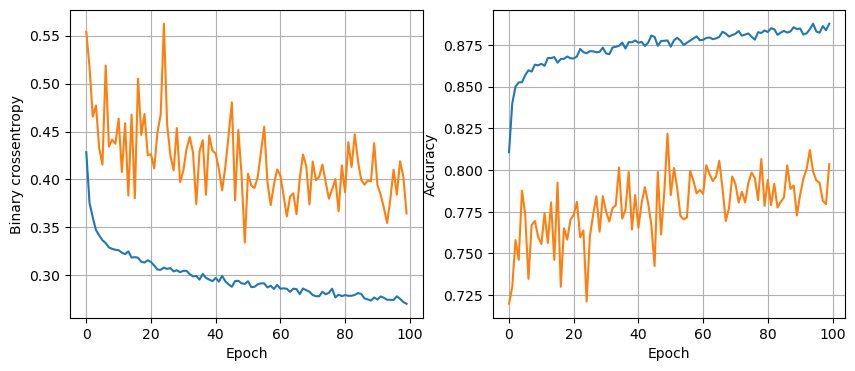

119/119 [==============================] - 0s 1ms/step - loss: 0.3068 - accuracy: 0.8780
nodes 64, dropout 0.2, lr 0.001, batch size 32


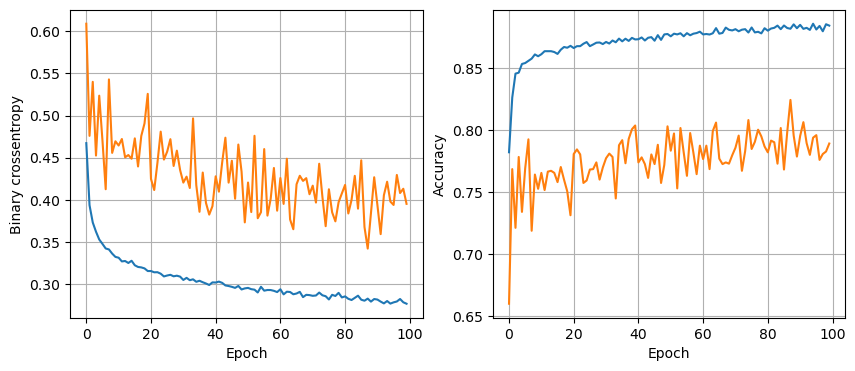

119/119 [==============================] - 0s 1ms/step - loss: 0.2960 - accuracy: 0.8801
nodes 64, dropout 0.2, lr 0.001, batch size 64


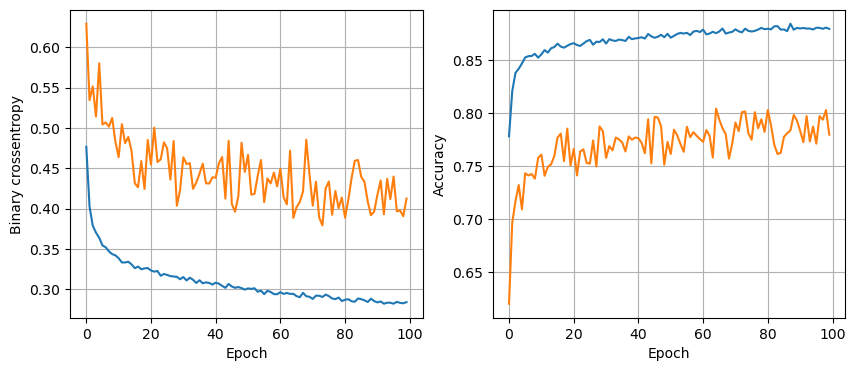

119/119 [==============================] - 0s 1ms/step - loss: 0.2967 - accuracy: 0.8762
nodes 64, dropout 0.2, lr 0.001, batch size 128


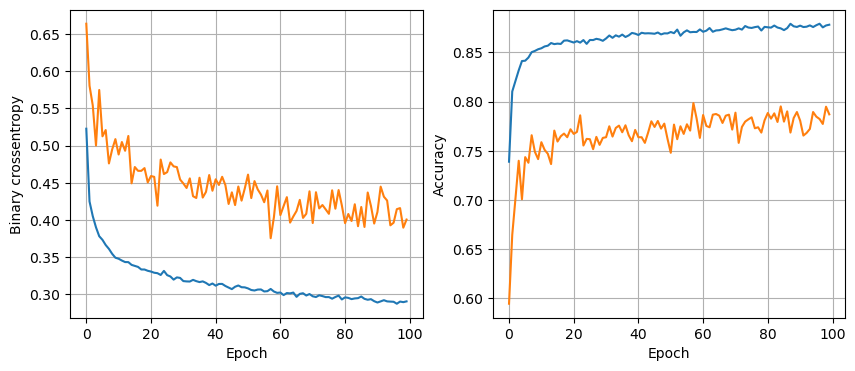

119/119 [==============================] - 0s 960us/step - loss: 0.2999 - accuracy: 0.8764


In [45]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in[32, 64, 128]:
                print(f"nodes {num_nodes}, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
                model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(x_valid, y_valid)[0]
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model

In [49]:
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1, )

119/119 [==============================] - 0s 786us/step


In [50]:
y_pred

array([0, 1, 0, ..., 1, 1, 1])

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.75      0.82      1346
           1       0.88      0.95      0.91      2458

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.88      3804

